1. IMPORTING ALL THE LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


2. IMPORTING THE DATASET

In [ ]:
df = pd.read_csv("Titanic-Dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 3. Checking for null values

In [ ]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Dropping all the irrevelant columns

we drop cabin column because 77% of the data is null in that column

In [ ]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

Impute the mean value of age in place of null values

In [ ]:
df["Age"] = df["Age"].fillna(df["Age"].mode()[0])

As Embarked is also categorical value -- impute it with mode of the value

In [ ]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [ ]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

4. Data Visualization

<ipython-input-44-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

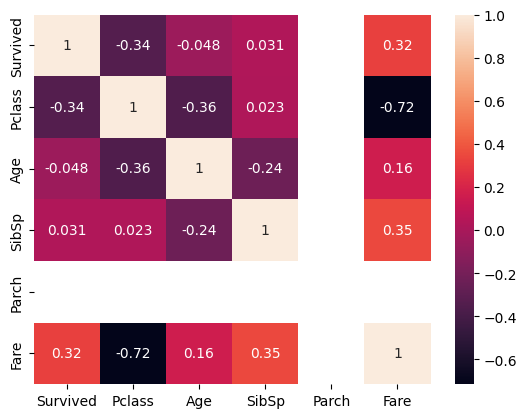

In [ ]:
sns.heatmap(df.corr(), annot = True)

<ipython-input-14-6f27886c73a2>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = "Embarked", y = "Survived", data = df, ci = None)


<Axes: xlabel='Embarked', ylabel='Survived'>

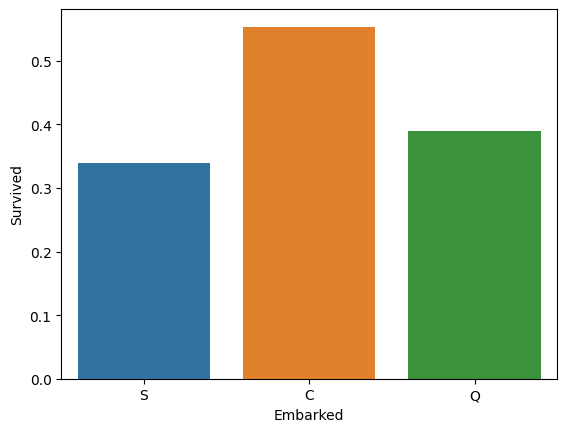

In [ ]:
sns.barplot(x = "Embarked", y = "Survived", data = df, ci = None)

<Axes: >

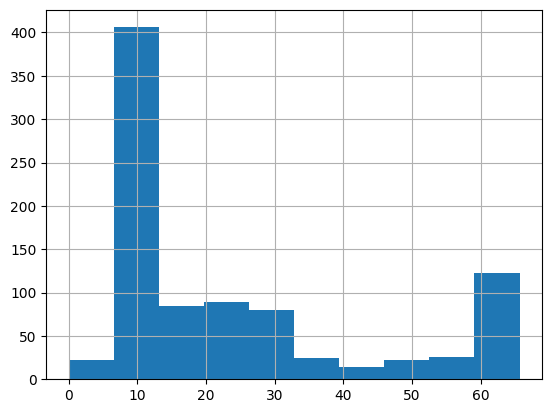

In [ ]:
df['Fare'].hist()

<Axes: >

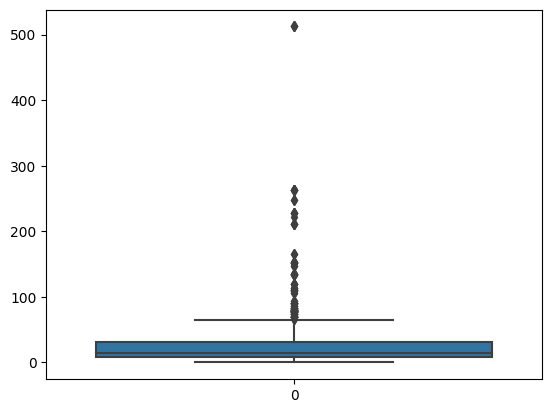

In [ ]:
sns.boxplot(df.Fare)

<Axes: >

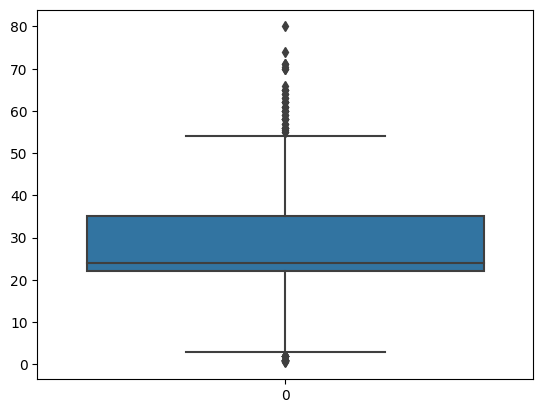

In [ ]:
sns.boxplot(df.Age)

 5. Outlier detection

 As we see from the above two boxplots, fare and age columns have outliers that needs to be deleted so as to increase accuracy of prediction


 FOR OUTLIERS IN AGE --- Using IQR method as it given better performance

In [ ]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
d = 1.5
lower_lim = Q1 -(d*IQR)
upper_lim = Q3 + (d*IQR)
df['Fare']=np.where(df['Fare']>upper_lim,upper_lim,np.where(df['Fare']<lower_lim,lower_lim,df['Fare']))

<Axes: >

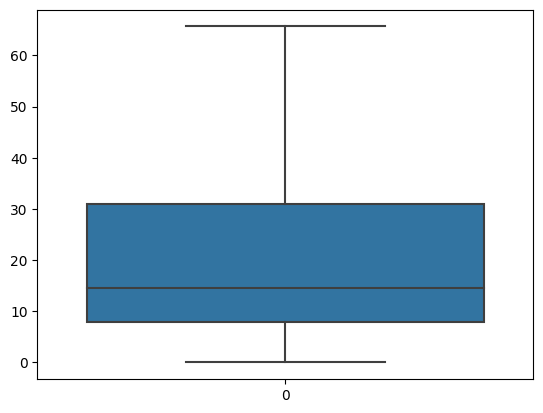

In [ ]:
sns.boxplot(df['Fare'])

Using the same technique for removing outliers in Age column

In [ ]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1
D = 1.5
lower_lim1 = q1 -(D*iqr)
upper_lim1 = q3 + (D*iqr)
df['Age']=np.where(df['Age']>upper_lim1,upper_lim1,np.where(df['Age']<lower_lim1,lower_lim1,df['Age']))

<Axes: >

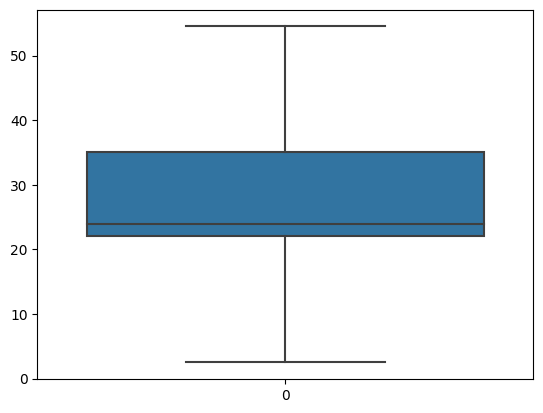

In [ ]:
sns.boxplot(df.Age)

 We also remove the outliers in SibSp and Parch columns

For SibSp


In [ ]:
Q1 = df['SibSp'].quantile(0.25)
Q3 = df['SibSp'].quantile(0.75)
IQR = Q3 - Q1
d = 1.5
lower_lim = Q1 - (d*IQR)
upper_lim = Q3 + (d*IQR)
df['SibSp']=np.where(df['SibSp']>upper_lim,upper_lim,np.where(df['SibSp']<lower_lim,lower_lim,df['SibSp']))


<Axes: >

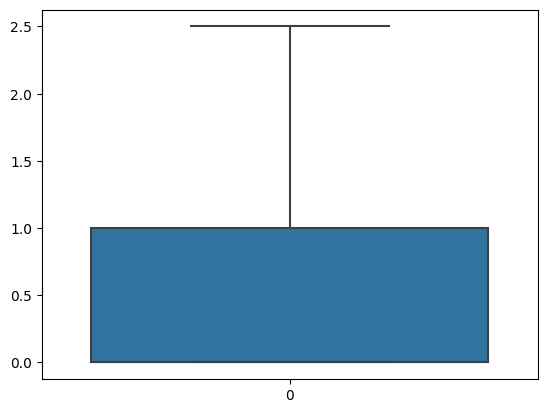

In [ ]:
sns.boxplot(df.SibSp)

 For Parch


In [ ]:
Q1 = df['Parch'].quantile(0.25)
Q3 = df['Parch'].quantile(0.75)
IQR = Q3 - Q1
d = 1.5
lower_lim = Q1 - (d*IQR)
upper_lim = Q3 + (d*IQR)
df['Parch']=np.where(df['Parch']>upper_lim,upper_lim,np.where(df['Parch']<lower_lim,lower_lim,df['Parch']))


<Axes: >

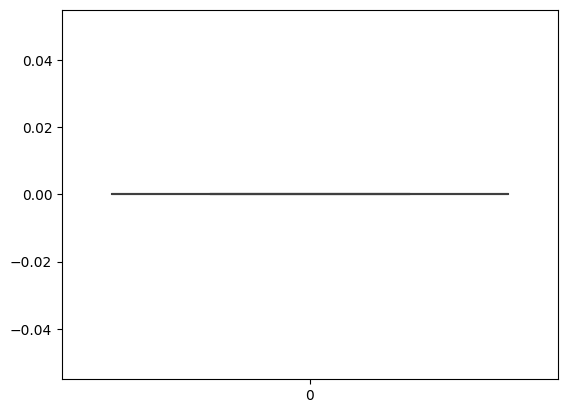

In [ ]:
sns.boxplot(df.Parch)

 Finally we again check if any columns have outliers

<Axes: >

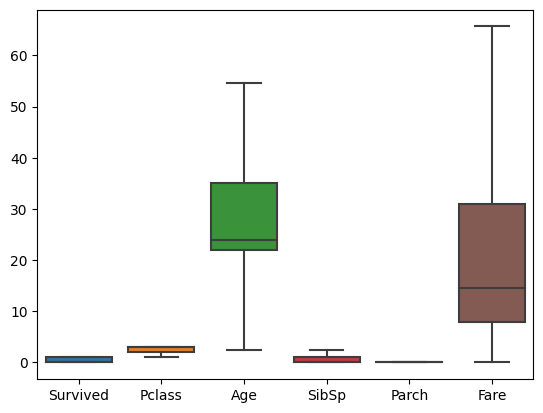

In [ ]:
sns.boxplot(df)









6. Splitting the data into dependent and independent variables

In [ ]:
x = df.drop(columns = ["Survived"], axis = 1) # Independent variables in the form of 2-D array
y = df["Survived"] # Survived column is the only dependent varaible here

In [ ]:
x.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1.0,0.0,7.2500,S
1,1,female,38.0,1.0,0.0,65.6344,C
2,3,female,26.0,0.0,0.0,7.9250,S
3,1,female,35.0,1.0,0.0,53.1000,S
4,3,male,35.0,0.0,0.0,8.0500,S


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

 7. Encoding the categorical columns


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
x["Sex"] = le.fit_transform(x["Sex"])
x["Embarked"] = le.fit_transform(x["Embarked"])
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1.0,0.0,7.2500,2
1,1,0,38.0,1.0,0.0,65.6344,0
2,3,0,26.0,0.0,0.0,7.9250,2
3,1,0,35.0,1.0,0.0,53.1000,2
4,3,1,35.0,0.0,0.0,8.0500,2


8. Feature Scaling -- Bringing all the independent variables in a single scalable format in order to process them


In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

In [ ]:
x_scaled = pd.DataFrame(ms.fit_transform(x), columns = x.columns)


 9. Splitting the data in train test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 0)

In [ ]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
140,1.0,0.0,0.413462,0.0,0.0,0.232284,0.0
439,0.5,1.0,0.548077,0.0,0.0,0.159977,1.0
817,0.5,1.0,0.548077,0.4,0.0,0.563793,0.0
378,1.0,1.0,0.336538,0.0,0.0,0.061134,0.0
491,1.0,1.0,0.355769,0.0,0.0,0.110460,1.0


In [ ]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
495,1.0,1.0,0.413462,0.0,0.0,0.220285,0.0
648,1.0,1.0,0.413462,0.0,0.0,0.115031,1.0
278,1.0,1.0,0.086538,1.0,0.0,0.443746,0.5
31,0.0,0.0,0.413462,0.4,0.0,1.000000,0.0
255,1.0,0.0,0.509615,0.0,0.0,0.232284,0.0


In [ ]:
y_train.head()


140    0
439    0
817    0
378    0
491    0
Name: Survived, dtype: int64

In [ ]:
y_test.head()


495    0
648    0
278    0
31     1
255    1
Name: Survived, dtype: int64

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(712, 7) (179, 7) (712,) (179,)
